# Main **Libraries**

In [8]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from google.colab import drive
from sklearn.inspection import permutation_importance
from sklearn.linear_model import PoissonRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt


# Dataset Read

In [9]:
#Load dataset
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Aireline dataset/target_encoded_dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset split**

In [10]:
#training data
y_train = dataset['formatted_price'][:192167]
y_test =  dataset['formatted_price'][192167:]

dataset.drop(columns=['formatted_price'],axis=1,inplace=True)
dataset.drop(columns=['num_of_hours_taken'],axis=1,inplace=True)
dataset.drop(columns=['flight_day'],axis=1,inplace=True)

#testing data
x_train = dataset[:192167]
x_test = dataset[192167:]

# **Multiple Linear Regression Model**

In [16]:
#using MUltiple Lineare Regression
MLR=linear_model.LinearRegression()

#training the Model
MLR.fit(x_train,y_train)

#test the model
MLR_prediction=MLR.predict(x_test)

In [17]:
def multipleLinearRegression():
 print('Model: Multiple Linear Regression')
 print(f'Training Score: {MLR.score(x_train,y_train)}')
 print(f'Test Score: {MLR.score(x_test,y_test)}')
 print(f'RMSE: {np.sqrt(mean_squared_error(y_test,MLR_prediction))}')

In [18]:
multipleLinearRegression()

Model: Multiple Linear Regression
Training Score: 0.8975778787640676
Test Score: 0.9152345409591374
RMSE: 6605.603339067593


# **Visualization**

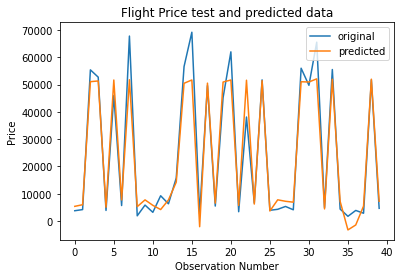

In [25]:
N=40
x_ax = range(len(y_test[:N]))

plt.plot(x_ax, y_test[:N], label="original")

plt.plot(x_ax, MLR_prediction[:N], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

# Polynomial **Regression**

In [19]:
#choose the degree of polynomial
poly_features = PolynomialFeatures(degree=4)

# transforms the existing features to higher degree features.
x_train_poly_model = poly_features.fit_transform(x_train)
x_test_poly_model = poly_features.fit_transform(x_test)

#using polynomial regression model
poly_model = linear_model.LinearRegression()

#training the model
poly_model.fit(x_train_poly_model, y_train)

#testing data
POLY_prediction = poly_model.predict(x_test_poly_model)

In [22]:
def polynomialRegression():
 print('Model: POLYNOMIAL Regressoin')
 print(f'Training Score: {poly_model.score(x_train_poly_model,y_train)}')
 print(f'Test Score: {poly_model.score(x_test_poly_model,y_test)}')
 print(f'RMSE: {np.sqrt(mean_squared_error(y_test,POLY_prediction))}')

In [23]:
polynomialRegression()

Model: POLYNOMIAL Regressoin
Training Score: 0.9374834778639233
Test Score: 0.9529877248151754
RMSE: 4919.360694381696


# **Visualization**

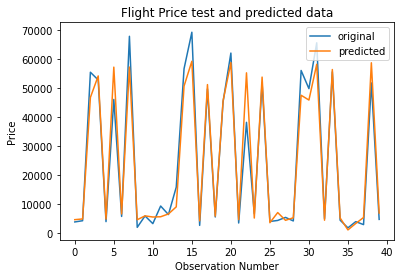

In [26]:
N=40
x_ax = range(len(y_test[:N]))

plt.plot(x_ax, y_test[:N], label="original")

plt.plot(x_ax, POLY_prediction[:N], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

# **Gradient Boosting regressor**

In [27]:
#specify the parameters
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 8,
    "learning_rate": 0.5,
    "loss": "squared_error",
}

#using Gradient Boosting regressor
GBR = ensemble.GradientBoostingRegressor(**params)

#training the Model
GBR.fit(x_train, y_train)

#test the model
GBR_prediction=GBR.predict(x_test)



In [30]:
def gradientBoostingRegressor():
 print('Model: Gradient Boosting regressor')
 print(f'Training Score: {GBR.score(x_train,y_train)}')
 print(f'Test Score: {GBR.score(x_test,y_test)}')
 print(f'RMSE: {np.sqrt(mean_squared_error(y_test,GBR_prediction))}')

In [31]:
gradientBoostingRegressor()

Model: Gradient Boosting regressor
Training Score: 0.9561384073015831
Test Score: 0.9675232848474443
RMSE: 4088.7360941994652


# **Visualization**

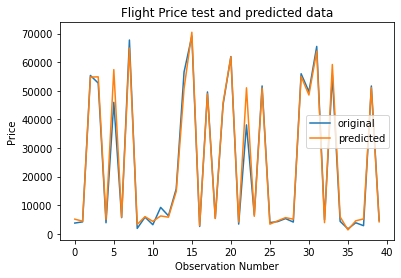

In [32]:
N=40
x_ax = range(len(y_test[:N]))

plt.plot(x_ax, y_test[:N], label="original")

plt.plot(x_ax, GBR_prediction[:N], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

In [33]:
def gradientBoostingRegressor():
 print('Model: Gradient Boosting regressor')
 print(f'Training Score: {GBR.score(x_train,y_train)}')
 print(f'Test Score: {GBR.score(x_test,y_test)}')
 print(f'RMSE: {np.sqrt(mean_squared_error(y_test,GBR_prediction))}')

# Poisson **Regression**

In [37]:
 #using Poisson Regressor
 PR=linear_model.PoissonRegressor(max_iter=200)

 #Training the model
 PR.fit(x_train,y_train)

 #testing the model
 PR_prediction=PR.predict(x_test)

In [39]:

def poissonRegression():
 print('Model: Poisson Regressor')
 print(f'Training Score: {PR.score(x_train,y_train)}')
 print(f'Test Score: {PR.score(x_test,y_test)}')
 print(f'RMSE: {np.sqrt(mean_squared_error(y_test,PR_prediction))}')

In [40]:
poissonRegression()

Model: Poisson Regressor
Training Score: 0.926091035105374
Test Score: 0.9447601582303451
RMSE: 5778.5323336525125


# **Visualization**

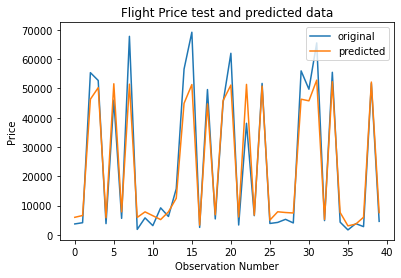

In [41]:
N=40
x_ax = range(len(y_test[:N]))

plt.plot(x_ax, y_test[:N], label="original")

plt.plot(x_ax, PR_prediction[:N], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

# ExtraTree **Regression**

In [42]:
#specify the parameters
params = {
    "n_estimators": 500,
}

#using ExtraTree Regression model 
ETR = ensemble.ExtraTreesRegressor(**params)

#training the model
ETR.fit(x_train,y_train)

#testing the model
ETR_prediction=ETR.predict(x_test)

In [43]:
def extraTreeRegression():
 print('Using model: ExtraTree Regression')
 print(f'Training Score: {ETR.score(x_train,y_train)}')
 print(f'Test Score: {ETR.score(x_test,y_test)}')
 print(f'RMSE: {np.sqrt(mean_squared_error(y_test,ETR_prediction))}')

In [44]:
extraTreeRegression()

Using model: ExtraTree Regression
Training Score: 0.9592483607979745
Test Score: 0.9680177819409197
RMSE: 4057.48872811211


# **Visualization**

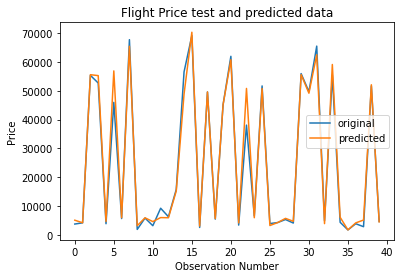

In [45]:
N=40
x_ax = range(len(y_test[:N]))

plt.plot(x_ax, y_test[:N], label="original")

plt.plot(x_ax, ETR_prediction[:N], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

# KNN **Model**

i have tried to use GridSearchCV to get the best K value for the model but it takes 2 running and didnt finished so i pickd randomly values and tried them until get the best MSE

In [46]:

#using the knn model and intiate its k value
KNN = KNeighborsRegressor(n_neighbors=17)

#training the model
KNN.fit(x_train,y_train)

#testin the model
KNN_prediction=KNN.predict(x_test)

In [47]:
def knnRegression():
 print('Using model: KNN')
 print(f'RMSE: {np.sqrt(mean_squared_error(y_test,KNN_prediction))}')

In [48]:
knnRegression()

Using model: KNN
RMSE: 4349.417996610536


# **Visualization**

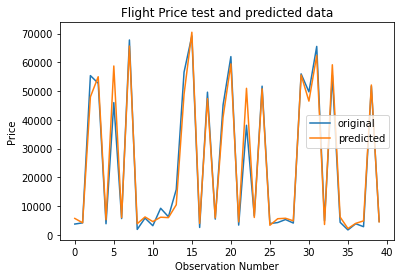

In [49]:
N=40
x_ax = range(len(y_test[:N]))

plt.plot(x_ax, y_test[:N], label="original")

plt.plot(x_ax, KNN_prediction[:N], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

# Models **comparison**

In [50]:
multipleLinearRegression()
print('--------------------------------------')
polynomialRegression()
print('--------------------------------------')
gradientBoostingRegressor()
print('--------------------------------------')
poissonRegression()
print('--------------------------------------')
extraTreeRegression()
print('--------------------------------------')
knnRegression()

Model: Multiple Linear Regression
Training Score: 0.8975778787640676
Test Score: 0.9152345409591374
RMSE: 6605.603339067593
--------------------------------------
Model: POLYNOMIAL Regressoin
Training Score: 0.9374834778639233
Test Score: 0.9529877248151754
RMSE: 4919.360694381696
--------------------------------------
Model: Gradient Boosting regressor
Training Score: 0.9561384073015831
Test Score: 0.9675232848474443
RMSE: 4088.7360941994652
--------------------------------------
Model: Poisson Regressor
Training Score: 0.926091035105374
Test Score: 0.9447601582303451
RMSE: 5778.5323336525125
--------------------------------------
Using model: ExtraTree Regression
Training Score: 0.9592483607979745
Test Score: 0.9680177819409197
RMSE: 4057.48872811211
--------------------------------------
Using model: KNN
RMSE: 4349.417996610536
